In [14]:
#from google.colab import drive
#from google.colab import files
import os
from lib.train_AI_lib import *

In [7]:
#os.chdir('..')
print(os.getcwd())

/content/APS360-2020Summer-Project


In [8]:
import cv2
#### Filters we want to use ####
edgeDetect = lambda oImg: cv2.Canny(oImg, 100, 100)
laplacian  = lambda pImg: cv2.Laplacian(pImg,cv2.CV_64F)
gradient   = lambda gImg: cv2.morphologyEx(gImg, cv2.MORPH_GRADIENT, (5,5))
opening    = lambda cImg: cv2.morphologyEx(cImg, cv2.MORPH_OPEN, kernel)
bilateral  = lambda bImg: cv2.bilateralFilter(bImg,9,75,75)

In [9]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(1,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

## Edge Detection

In [7]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect})

In [8]:
torch.cuda.is_available()

True

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 101.62s | Training Error: 0.9842951059, Training loss: 23.2233907680 | Validation Error: 0.9678362573, Validation loss: 19.5890453122
Epoch 1 | Time Taken: 85.17s | Training Error: 0.9824689554, Training loss: 19.4628399548 | Validation Error: 0.9941520468, Validation loss: 18.6564384859
Epoch 2 | Time Taken: 83.42s | Training Error: 0.9839298758, Training loss: 18.0463778439 | Validation Error: 0.9795321637, Validation loss: 17.2906089724
Epoch 3 | Time Taken: 82.49s | Training Error: 0.9769905040, Training loss: 17.1726068432 | Validation Error: 0.9795321637, Validation loss: 16.3200289931
Epoch 4 | Time Taken: 82.95s | Training Error: 0.9780861943, Training loss: 16.4561490809 | Validation Error: 0.9619883041, Validation loss: 15.5484328715
Epoch 5 | Time Taken: 83.04s | Training Error: 0.9715120526, Training loss: 15.0090136423 | Validation Error: 0.9736842105, Validation loss: 14.8259470795
Epoch 6 | Time Taken: 83.47s 

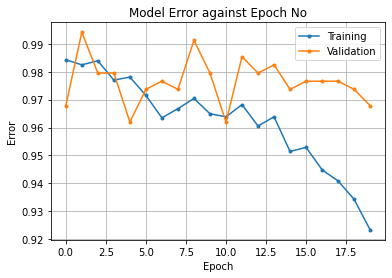

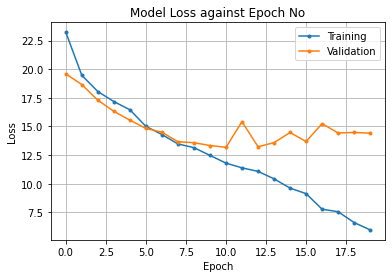

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [23.223390768023254,
  19.462839954765048,
  18.04637784389275,
  17.172606843160608,
  16.456149080871853,
  15.009013642251494,
  14.294841923234632,
  13.472122935059291,
  13.146988071087396,
  12.470741201471391,
  11.79758205036916,
  11.383744064643917,
  11.07619244521494,
  10.42679281661405,
  9.614258198894264,
  9.132759108197511,
  7.773553349669371,
  7.551252846205387,
  6.610477201877499,
  5.965589611148282],
 [19.589045312231868,
  18.656438485871178,
  17.290608972384973,
  16.320028993101428,
  15.54843287149578,
  14.825947079487209,
  14.49802980819893,
  13.663573321701934,
  13.58135026652891,
  13.33456211785749,
  13.175370567786686,
  15.416722562971328,
  13.229079781212608,
  13.583707672027407,
  14.47344969875974,
  13.684836717991605,
  15.241776183307339,
  14.42845363404539,
  14.474411008821411,
  14.409429302787506],
 [0.9842951059167275,
  0.9824689554419284,
  0.9839298758217

In [10]:
my_model = CNN(name = "edgeDetect")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

## laplacian

In [18]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': laplacian, 'grey':1})

WTF PRINT ME
DEFAULTTTT AND GREY 1


In [19]:
my_model = CNN(name = "laplacian")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

CUDA is available!  Training on GPU ...
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY
GREYYYYYY


KeyboardInterrupt: 

## gradient

In [29]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': gradient})

In [ ]:
my_model = CNN(name = "gradient")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

## opening

## Bilateral